In [2]:
import ee
ee.Initialize()
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Map the function over one year of data and take the median.
#Load Sentinel-2 TOA reflectance data.

date1 = ee.Date('2020-01-10')
date2 = ee.Date('2020-04-26')

#Pre-filter to get less cloudy granules.
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY').filterDate(date1, date2)

In [37]:
CHIRPS_median=dataset.reduce(ee.Reducer.mean())

In [4]:
point = ee.Geometry.Point(-63.3189,-33.4217) #Longitud - Latitud

In [5]:
l = dataset.filterBounds(point).getRegion(point, 30).getInfo()

In [6]:
out = [dict(zip(l[0], values)) for values in l[1:]]

In [7]:
print(out)

[{'id': '20200110', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1578614400000, 'precipitation': 0}, {'id': '20200111', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1578700800000, 'precipitation': 0}, {'id': '20200112', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1578787200000, 'precipitation': 22.331579208374023}, {'id': '20200113', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1578873600000, 'precipitation': 0}, {'id': '20200114', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1578960000000, 'precipitation': 11.165789604187012}, {'id': '20200115', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1579046400000, 'precipitation': 11.165789604187012}, {'id': '20200116', 'longitude': -63.31896552679804, 'latitude': -33.42177522990259, 'time': 1579132800000, 'precipitation': 0}, {'id': '20200117', 'longitude': -63.31896552679804, 

In [8]:
Dates=np.zeros(len(out)).tolist()
PP=np.zeros(len(out)).tolist()
df=pd.DataFrame()

In [19]:
for i in range(len(out)):
    a=out[i]['id']
    b=a.split(sep='_')
    b1=b[0]
    b2=b1.split(sep='T')
    Dates[i]=datetime.strptime(b2[0], "%Y%m%d")
    PP[i]=out[i]['precipitation']


In [21]:
df['Dates'] = Dates
df['PP']= PP
df.set_index('Dates', inplace=True)
#return(df)
print(df)

                   PP
Dates                
2020-01-10   0.000000
2020-01-11   0.000000
2020-01-12  22.331579
2020-01-13   0.000000
2020-01-14  11.165790
2020-01-15  11.165790
2020-01-16   0.000000
2020-01-17   0.000000
2020-01-18   0.000000
2020-01-19   0.000000
2020-01-20   7.193990
2020-01-21   6.965512
2020-01-22   0.000000
2020-01-23   0.000000
2020-01-24   0.000000
2020-01-25   0.000000
2020-01-26   0.000000
2020-01-27   0.000000
2020-01-28   0.000000
2020-01-29  11.644282
2020-01-30   0.000000
2020-01-31   0.000000
2020-02-01   0.000000
2020-02-02   0.000000
2020-02-03   0.000000
2020-02-04  10.464651
2020-02-05  52.323246
2020-02-06   0.000000
2020-02-07   0.000000
2020-02-08   0.000000
...               ...
2020-03-02   0.000000
2020-03-03   0.000000
2020-03-04   0.000000
2020-03-05   0.000000
2020-03-06   8.265753
2020-03-07   0.000000
2020-03-08   0.000000
2020-03-09   0.000000
2020-03-10   8.265753
2020-03-11  15.887457
2020-03-12  31.774914
2020-03-13   0.000000
2020-03-14

In [12]:
df.head(20)

,PP
Dates,
2020-01-10,0.000000
2020-01-11,0.000000
2020-01-12,22.331579
2020-01-13,0.000000
2020-01-14,11.165790
2020-01-15,11.165790
2020-01-16,0.000000
2020-01-17,0.000000
2020-01-18,0.000000


In [33]:
df.sum()

PP    317.707454
dtype: float64

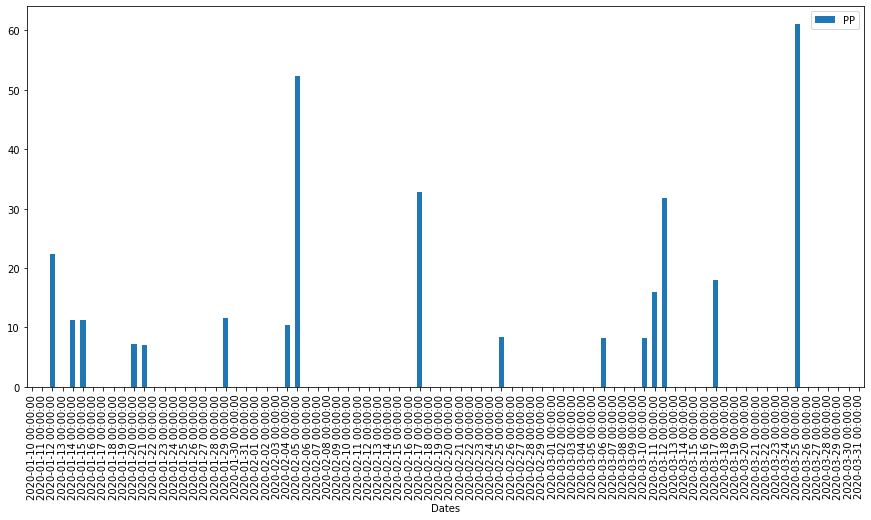

In [32]:
#df.plot(label='PP',markersize=8,marker='.', linestyle='-')
df.plot(label='PP', kind='bar', figsize= (15,7))